In [5]:
from utils import *
from data import *
from sklearn.metrics import mean_absolute_error, mean_squared_error
import torch

best_parameter_path = 'parameters\Sat May 27 11-16-34 2023'

_, _, test_dataset = get_force_transfer_dataset()
# _, test_dataset, _ = get_force_transfer_dataset()
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=None)

seed_everything()
data = torch.load(open(best_parameter_path, 'rb'))
model = data['model']

model.eval()
with torch.no_grad():
    ys = []
    preds = []
    for X, y in test_loader:
        pred = model(X)
        try:
            ys.append(y.cpu().detach().numpy())
            preds.append(pred.cpu().detach().numpy())
        except ValueError:
            break
    ys_flat = [e for y in ys for e in y]
    preds_flat = [e for pred in preds for e in pred]
    mae = mean_absolute_error(ys_flat, preds_flat)
    mse = mean_squared_error(ys_flat, preds_flat)
    rmse = mse ** 0.5
    print(f'{mae = }')
    print(f'{mse = }')
    print(f'{rmse = }')

mae = 152.3366
mse = 77860.14
rmse = 279.0343000869248


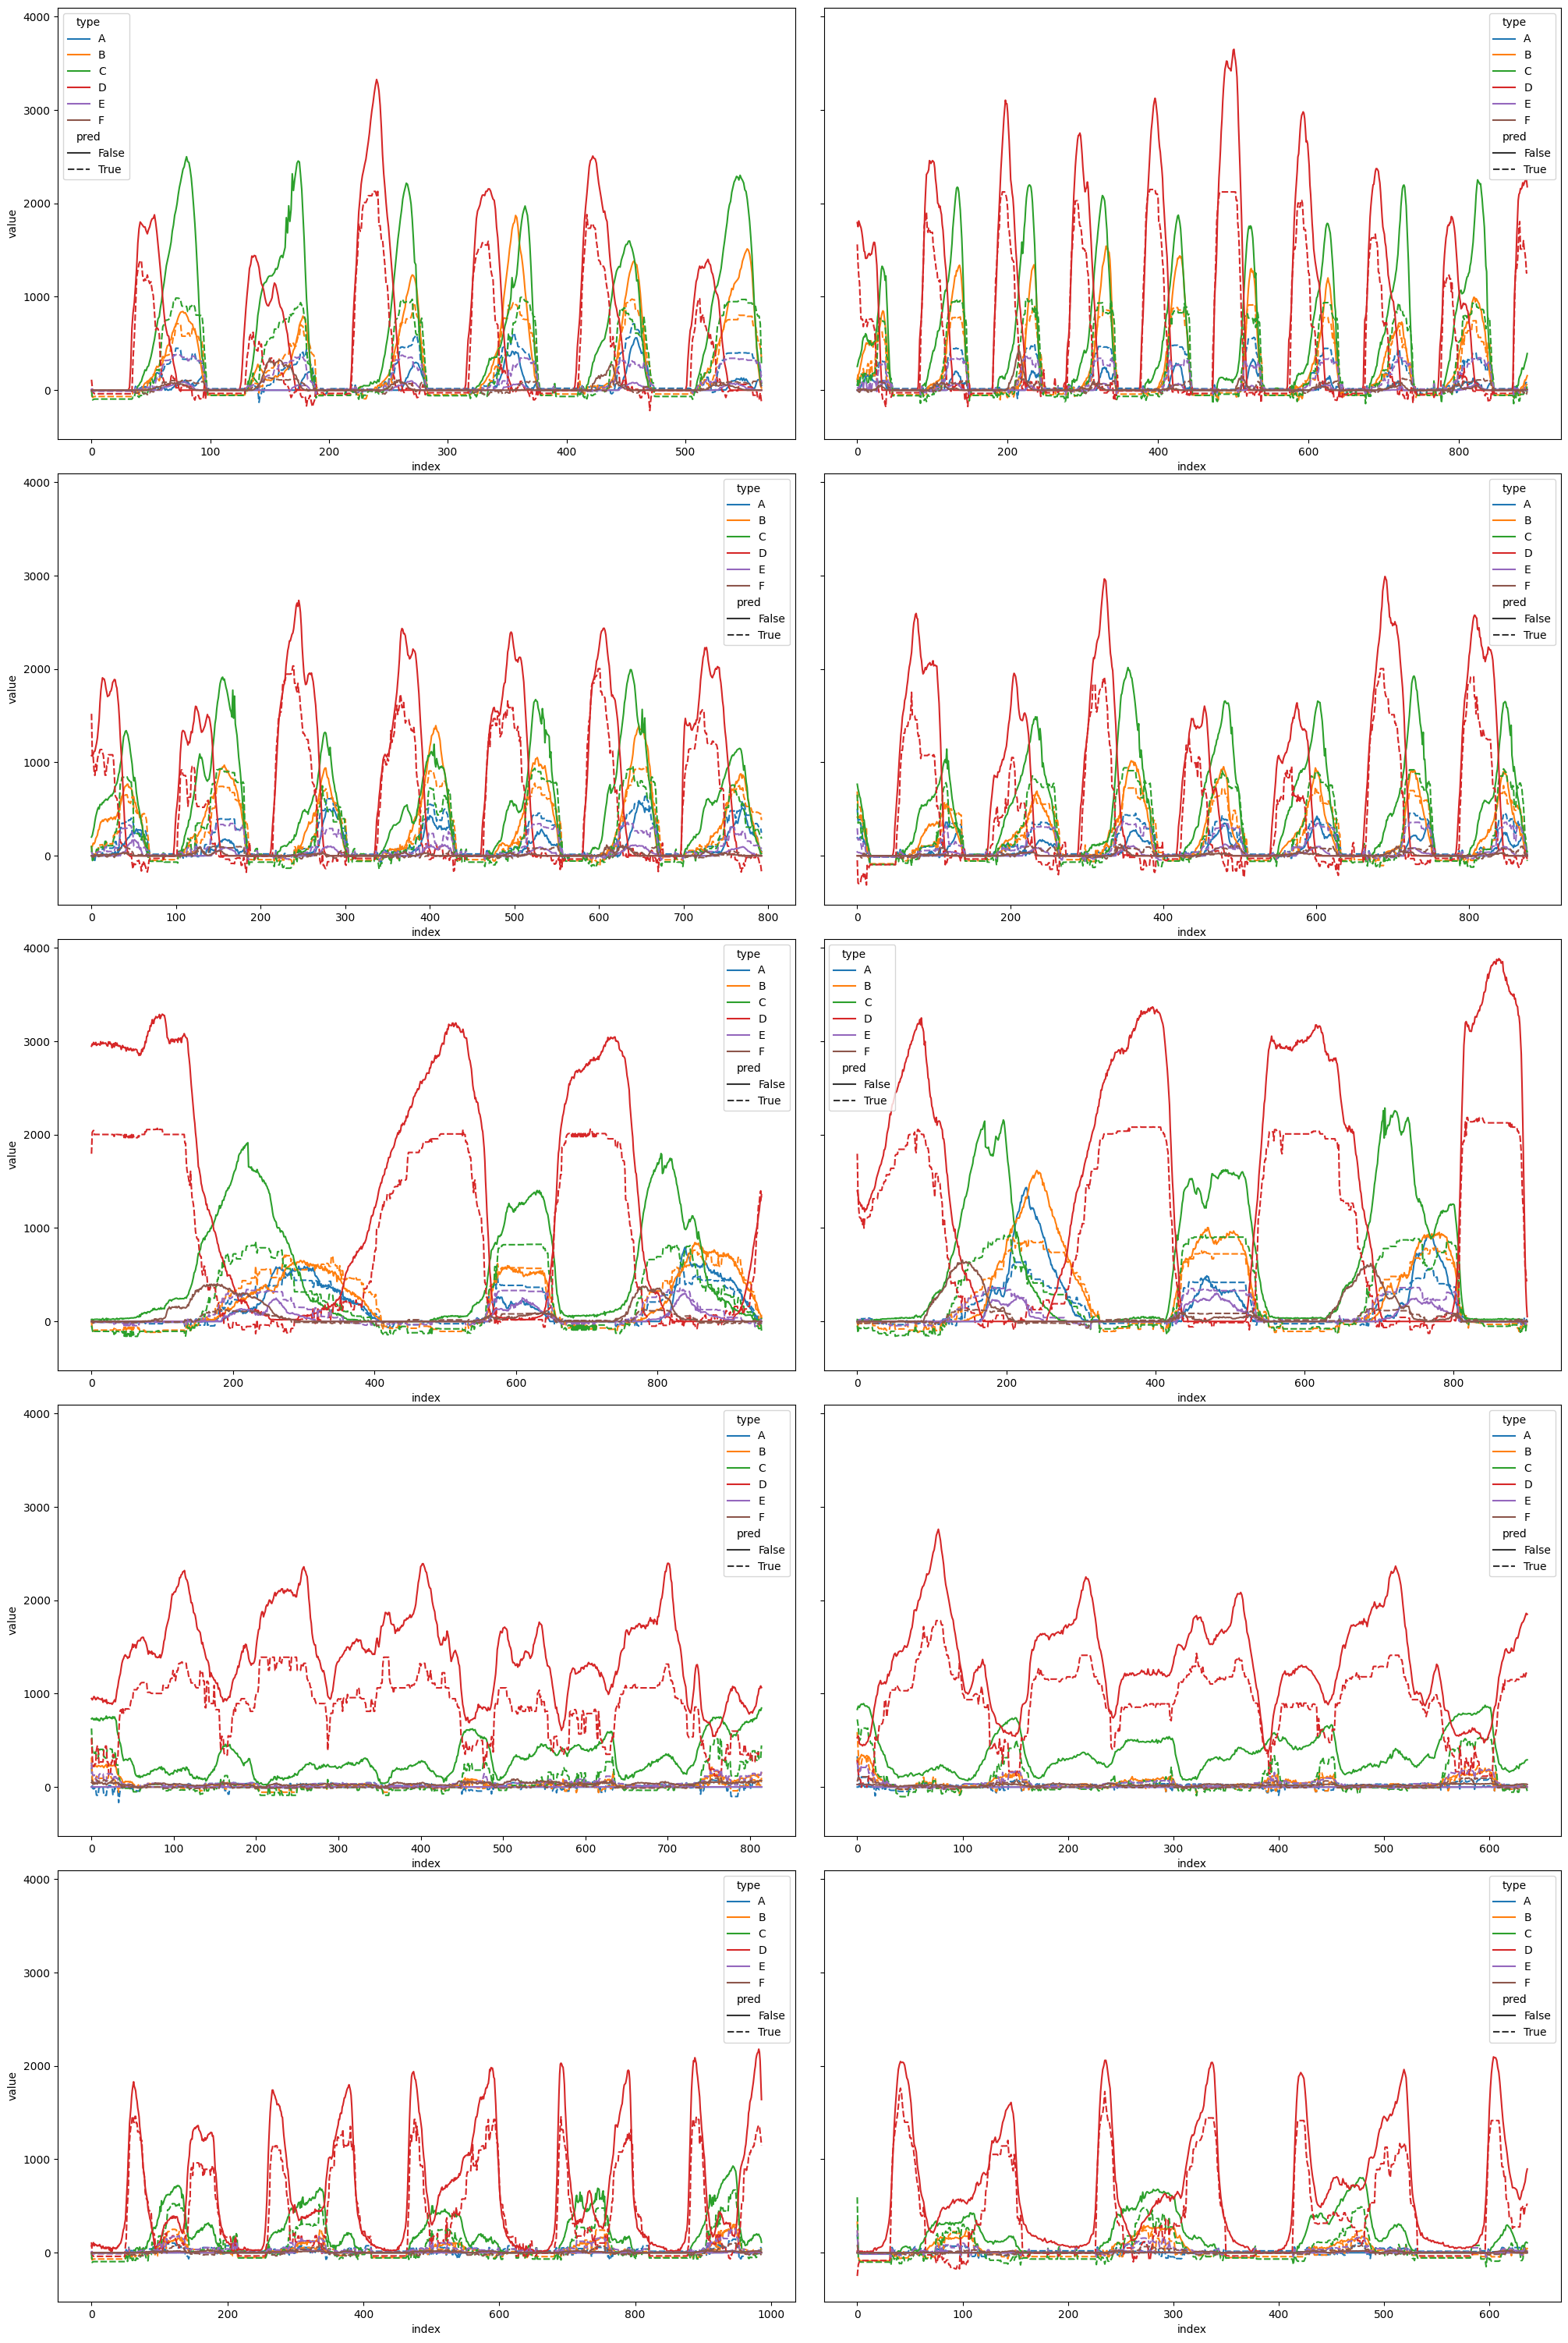

In [6]:
import seaborn as sns

def axes_plotting(ys, preds, ax):
    indexes_col = []
    ys_col = []
    types_col = []
    preds_col = []
    for i in range(6):
        y_col = ys[:, i]
        type_col = np.empty(y_col.shape, dtype=str)
        type_col.fill('ABCDEF'[i])
        pred_col = np.empty(y_col.shape, dtype=bool)
        pred_col.fill(False)
        indexes_col.append(list(range(len(y_col))))
        ys_col.append(y_col)
        types_col.append(type_col)
        preds_col.append(pred_col)
        y_col = preds[:, i]
        type_col = np.empty(y_col.shape, dtype=str)
        type_col.fill('ABCDEF'[i])
        pred_col = np.empty(y_col.shape, dtype=bool)
        pred_col.fill(True)
        indexes_col.append(list(range(len(y_col))))
        ys_col.append(y_col)
        types_col.append(type_col)
        preds_col.append(pred_col)
    indexes_col = np.concatenate(indexes_col)
    ys_col = np.concatenate(ys_col)
    types_col = np.concatenate(types_col)
    preds_col = np.concatenate(preds_col)
    df = pd.DataFrame({'index': indexes_col, 'value': ys_col, 'type': types_col, 'pred': preds_col})
    df.reset_index(inplace=True)
    sns.lineplot(df, x='index', y='value', hue='type', style='pred', ax=ax)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 2, sharey=True, figsize=(20, 30))
plt.tight_layout()

for i, (y, pred) in enumerate(zip(ys, preds)):
    axes_plotting(y, pred, axes[i // 2][i % 2])

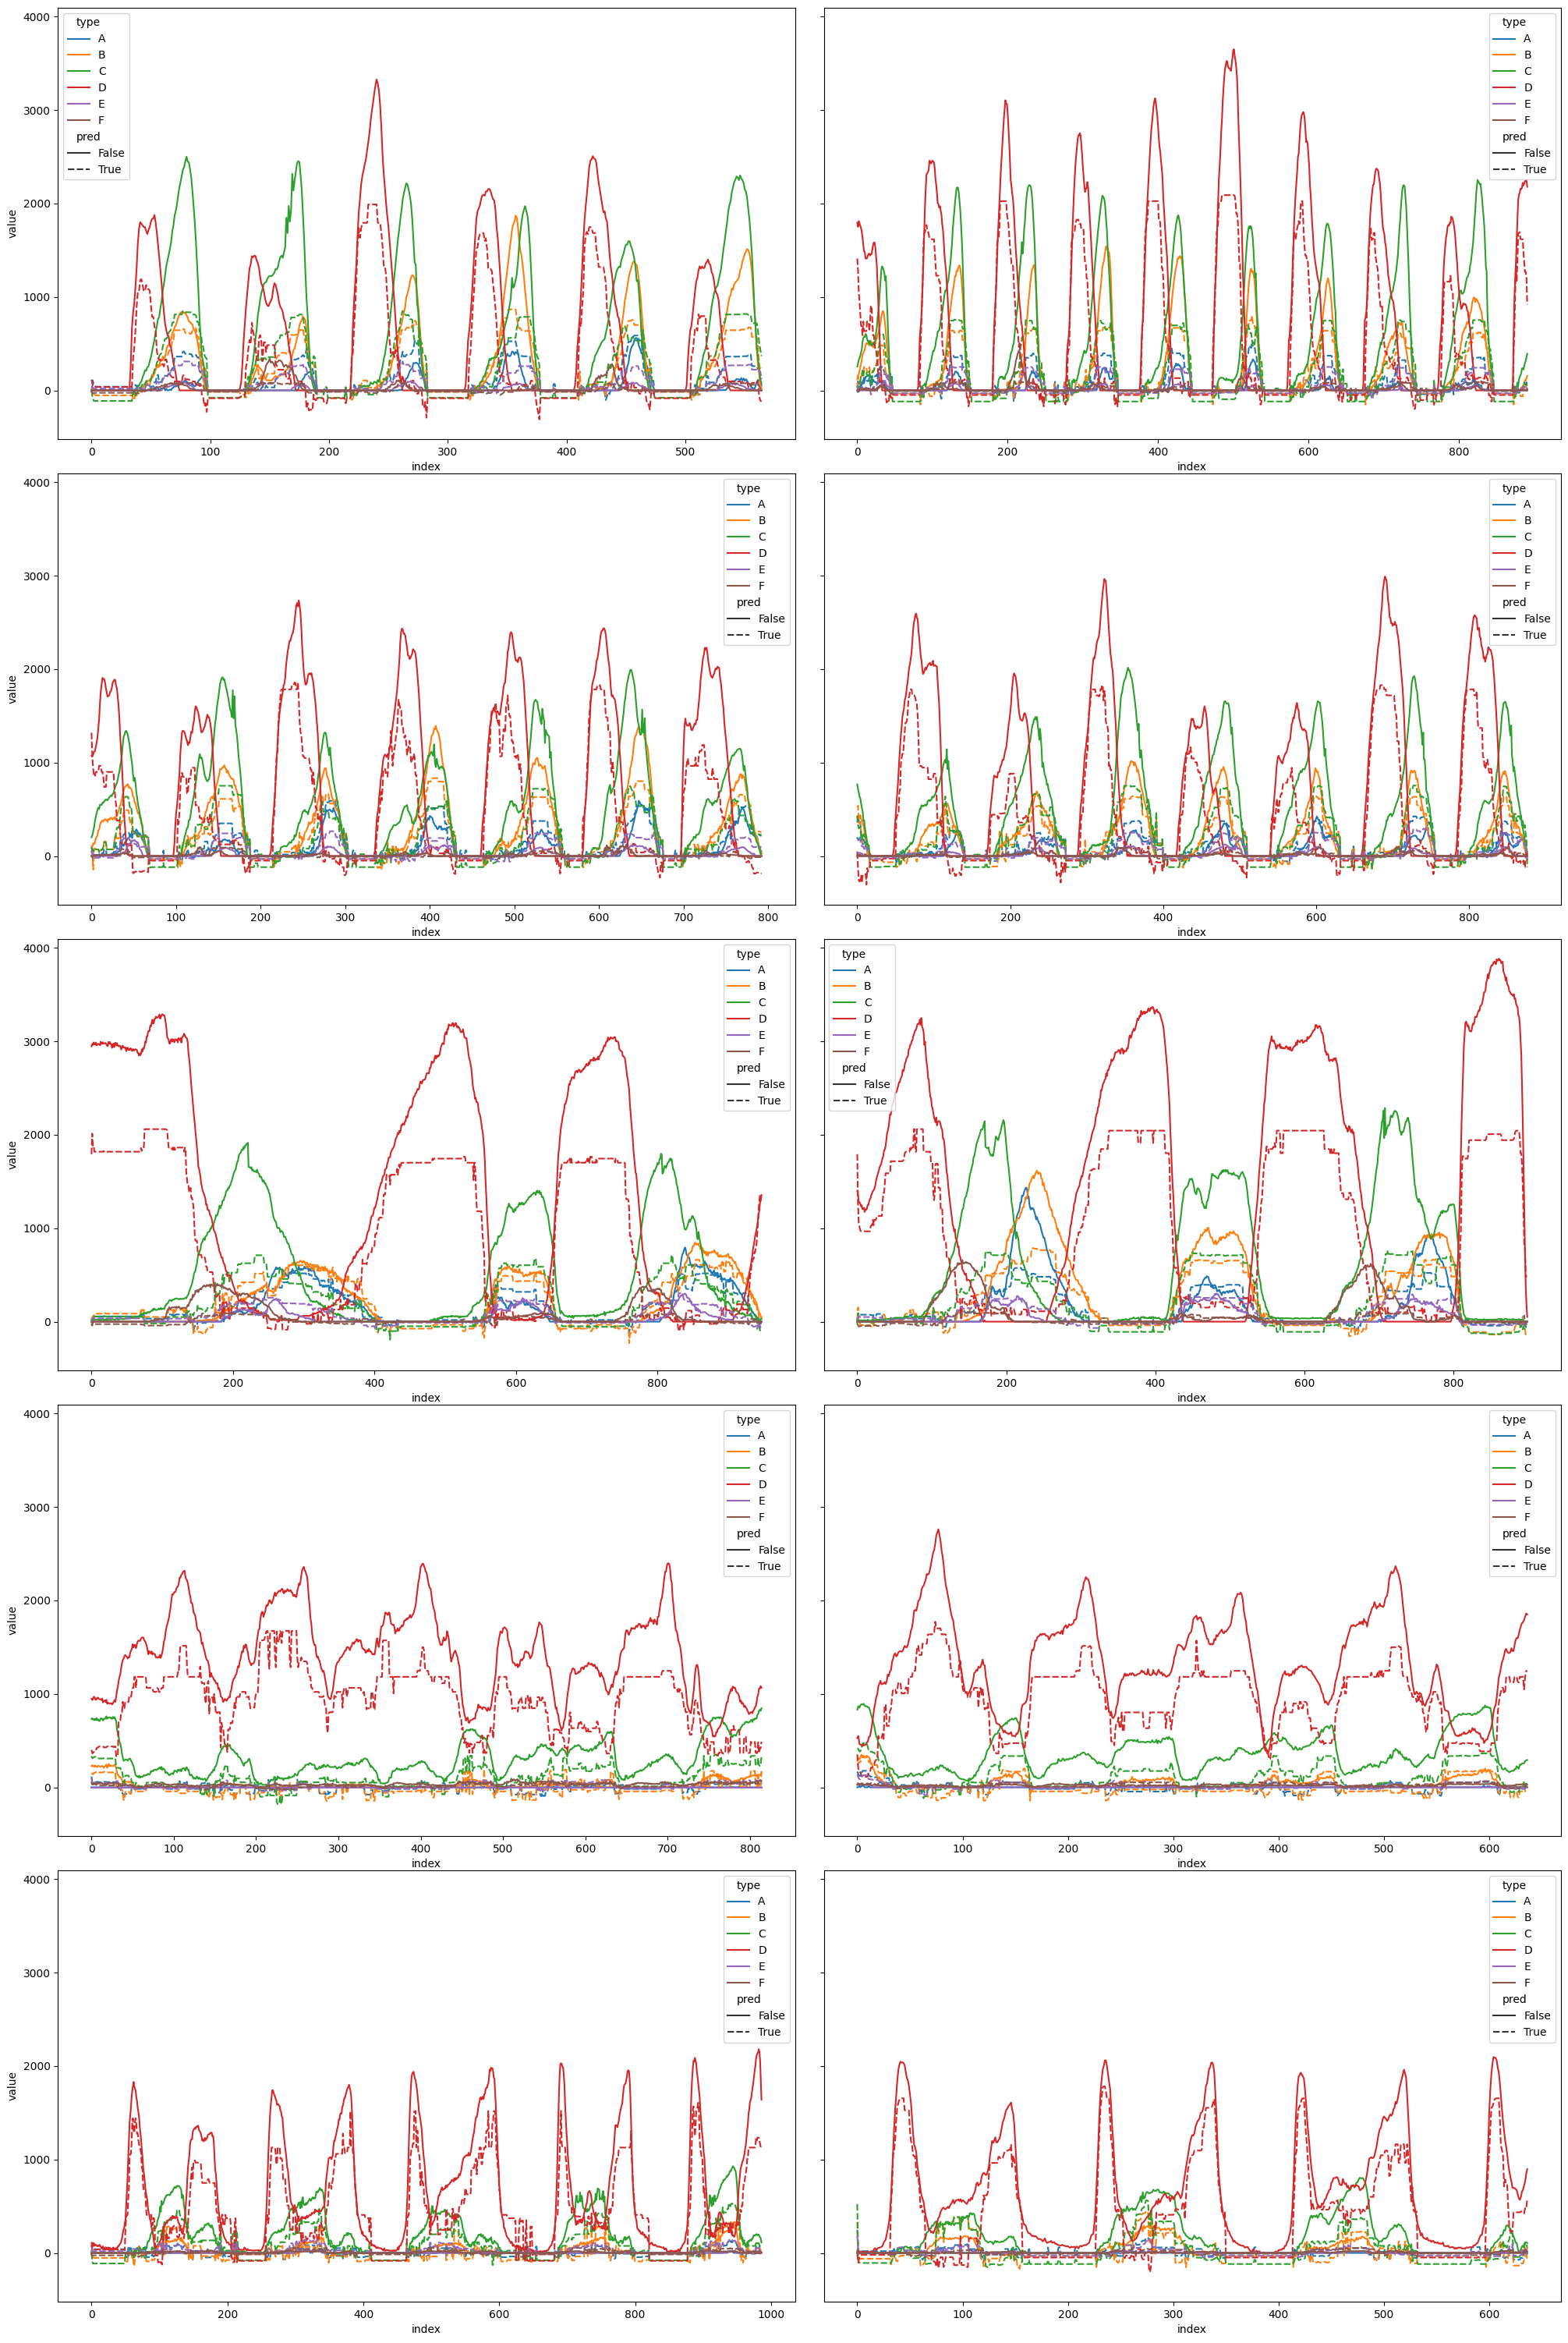

In [5]:
import seaborn as sns

def axes_plotting(ys, preds, ax):
    indexes_col = []
    ys_col = []
    types_col = []
    preds_col = []
    for i in range(6):
        y_col = ys[:, i]
        type_col = np.empty(y_col.shape, dtype=str)
        type_col.fill('ABCDEF'[i])
        pred_col = np.empty(y_col.shape, dtype=bool)
        pred_col.fill(False)
        indexes_col.append(list(range(len(y_col))))
        ys_col.append(y_col)
        types_col.append(type_col)
        preds_col.append(pred_col)
        y_col = preds[:, i]
        type_col = np.empty(y_col.shape, dtype=str)
        type_col.fill('ABCDEF'[i])
        pred_col = np.empty(y_col.shape, dtype=bool)
        pred_col.fill(True)
        indexes_col.append(list(range(len(y_col))))
        ys_col.append(y_col)
        types_col.append(type_col)
        preds_col.append(pred_col)
    indexes_col = np.concatenate(indexes_col)
    ys_col = np.concatenate(ys_col)
    types_col = np.concatenate(types_col)
    preds_col = np.concatenate(preds_col)
    df = pd.DataFrame({'index': indexes_col, 'value': ys_col, 'type': types_col, 'pred': preds_col})
    df.reset_index(inplace=True)
    sns.lineplot(df, x='index', y='value', hue='type', style='pred', ax=ax)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(5, 2, sharey=True, figsize=(20, 30))
plt.tight_layout()

for i, (y, pred) in enumerate(zip(ys, preds)):
    axes_plotting(y, pred, axes[i // 2][i % 2])